### Question 2

#### Part a

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('billboard.csv', index_col = 0)

In [15]:
df.head()

,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33


In [16]:
df.groupby(['song_id','song','performer']).agg({'url':'count'}).sort_values(by = 'url', ascending = False)[:10].reset_index()\
[['song','performer','url']].rename(columns = {'url':'count'})


,song,performer,count
0,Radioactive,Imagine Dragons,87
1,Sail,AWOLNATION,79
2,I'm Yours,Jason Mraz,76
3,Blinding Lights,The Weeknd,76
4,How Do I Live,LeAnn Rimes,69
5,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
6,Counting Stars,OneRepublic,68
7,Rolling In The Deep,Adele,65
8,Foolish Games/You Were Meant For Me,Jewel,65
9,Before He Cheats,Carrie Underwood,64


#### By aggregating the data at a song ID level, we can get the number of weeks it stays in Billboards top 100. Further, if we order it in descending we will have our desired list of top 10 most popular songs since 1958.

#### Coincidently, our favorite song Radioactive tops the list! :)

#### Part b

In [19]:
df.shape

(327895, 12)

In [20]:
df_yearly_uniq_songs = df[~df['year'].isin([1958,2021])].drop_duplicates(subset = ['year','song_id'])
val_counts = df_yearly_uniq_songs.groupby(['year'])['song_id'].count()


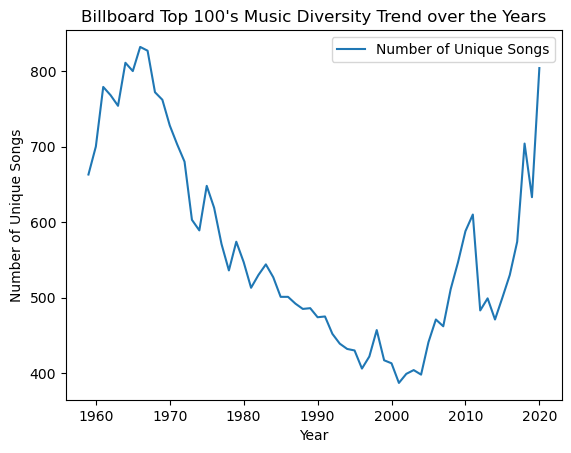

In [21]:
plt.plot(val_counts.keys(),val_counts.values, marker='None', linestyle='-', label='Number of Unique Songs')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title("Billboard Top 100's Music Diversity Trend over the Years")
plt.legend(loc='best')
plt.show()

#### Dropping duplicates at year cross song ID levels, provides us with a dataframe which has unique songs each year. Aggregating this new dataframe and plotting against time gives us our desired trend

#### Looks like the year 2000 was a low point for Billboard's diversity. Not a good note to start a new century. Thankfully the trends picked up after that.

#### It appears that there was a significant drop in music diversity around early 2000s

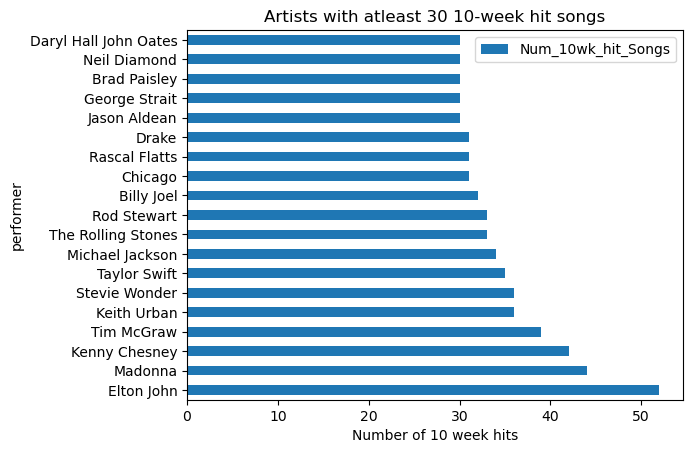

In [31]:
df = df.sort_values(by = ['year','week'])
# using cumcounts, which generates cumulative counts within each group. Just like row_number () function in SQL
df['row_number'] = df.sort_values(['year', 'week']).groupby(['song_id']).cumcount() + 1
val_counts = df[df['row_number'] == 10].groupby('performer').agg({'url':'count'}).rename(columns = {'url':'Num_10wk_hit_Songs'}).sort_values(by = 'Num_10wk_hit_Songs', ascending = False)

val_counts[val_counts['Num_10wk_hit_Songs']>=30].plot(kind = 'barh')
plt.xlabel('Number of 10 week hits')
plt.title('Artists with atleast 30 10-week hit songs')
plt.show()

#### To find the songs which are a 10 week hit, we created a row_number indicator, which increases by 1 for each consequetive week a song id is present in Billboard's top 100. The songs with >= 10 occurences are shortlisted, and the performers with atleast 30 such songs are filtered. That's how we get the above bar plot

#### These are the performers who have stood the test of time